In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data.values
y = boston.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_reg', Ridge())
])

In [10]:
param_grid = {'ridge_reg__alpha': [0.1, 1.0, 10.0, 100.0]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Ridge alpha: {grid_search.best_params_['ridge_reg__alpha']}")

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression R²: {r2:.3f}")
print(f"Ridge Regression MSE: {mse:.2f}")

Best Ridge alpha: 10.0
Ridge Regression R²: 0.818
Ridge Regression MSE: 13.34


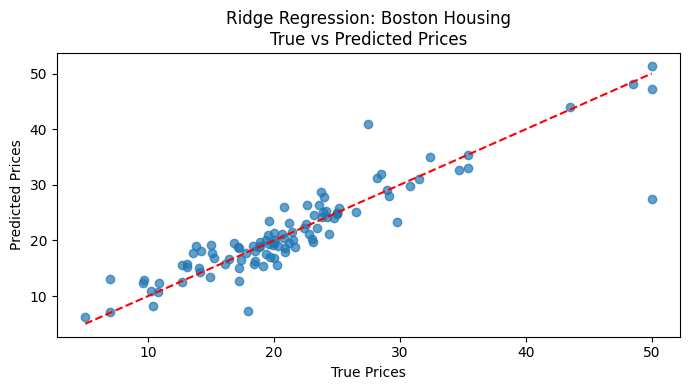

In [11]:
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Boston Housing\nTrue vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()